# Persoalan
Unduhlah salah satu data di situs SEKI https://www.bi.go.id/id/statistik/ekonomi-
keuangan/seki/default.aspx , Lakukan  prediktif analitik, time series forecasting untuk 
menganalisis ada tidaknya tren, siklus atau seasonal. Berikan penjelasan hasil perhitungan 
dan carilah perhitungan performanya.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [27]:
# Membaca dataset
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')
df = df.rename(columns={'PRODUK DOMESTIK BRUTO': 'PDB'})
df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')
df = df.set_index('Quarter')

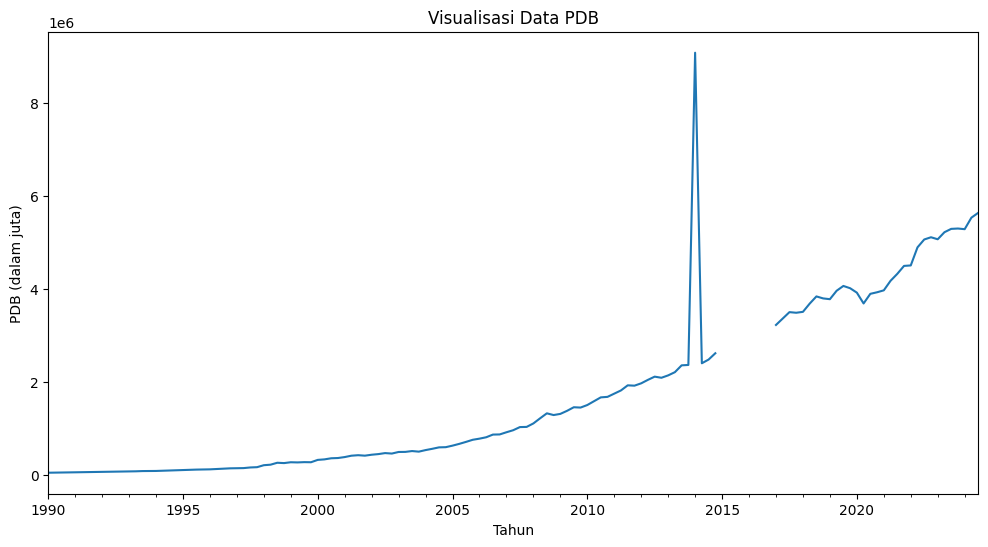

In [28]:
# Plot data
df['PDB'].plot(title="Visualisasi Data PDB", figsize=(12, 6))
plt.xlabel("Tahun")
plt.ylabel("PDB (dalam juta)")
plt.show()

In [29]:
# Mengisi sementara nilai yang hilang dengan interpolasi
df_interpolated = df.copy()
df_interpolated['PDB'] = df_interpolated['PDB'].interpolate(method='time')


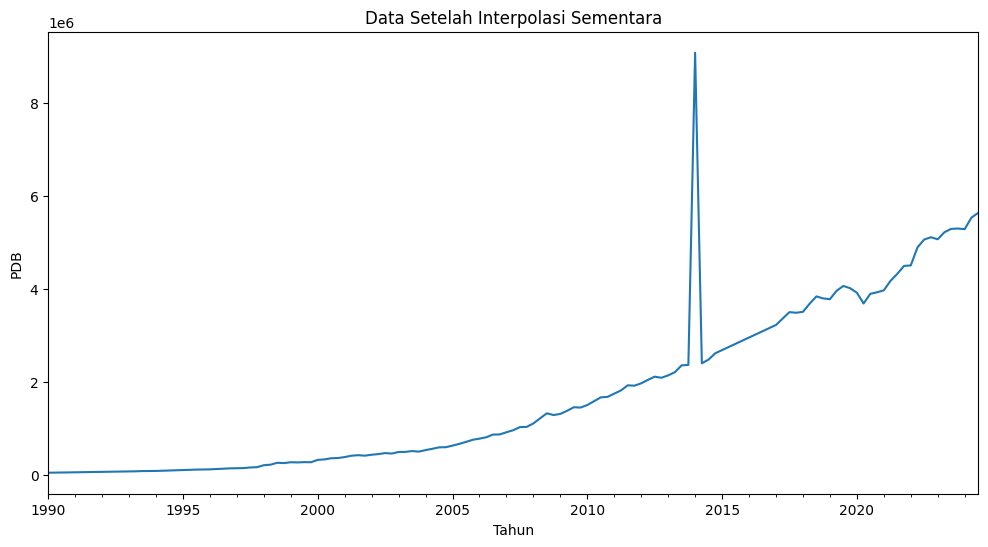

In [30]:
# Plot data setelah interpolasi sementara
df_interpolated['PDB'].plot(title="Data Setelah Interpolasi Sementara", figsize=(12, 6))
plt.xlabel("Tahun")
plt.ylabel("PDB")
plt.show()

In [31]:
# Melatih SARIMA pada data dengan interpolasi sementara
model = SARIMAX(df_interpolated['PDB'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarima_model = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44829D+01    |proj g|=  9.38720D-02

At iterate    5    f=  1.44159D+01    |proj g|=  1.92134D-03

At iterate   10    f=  1.44158D+01    |proj g|=  2.45278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     13      1     0     0   1.298D-05   1.442D+01
  F =   14.415797379664721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [32]:
df_fixed = df.copy()
for idx in df[df['PDB'].isnull()].index:
    df_fixed.loc[idx, 'PDB'] = sarima_model.predict(start=idx, end=idx)[0]

/tmp/ipykernel_549516/628214376.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_fixed.loc[idx, 'PDB'] = sarima_model.predict(start=idx, end=idx)[0]


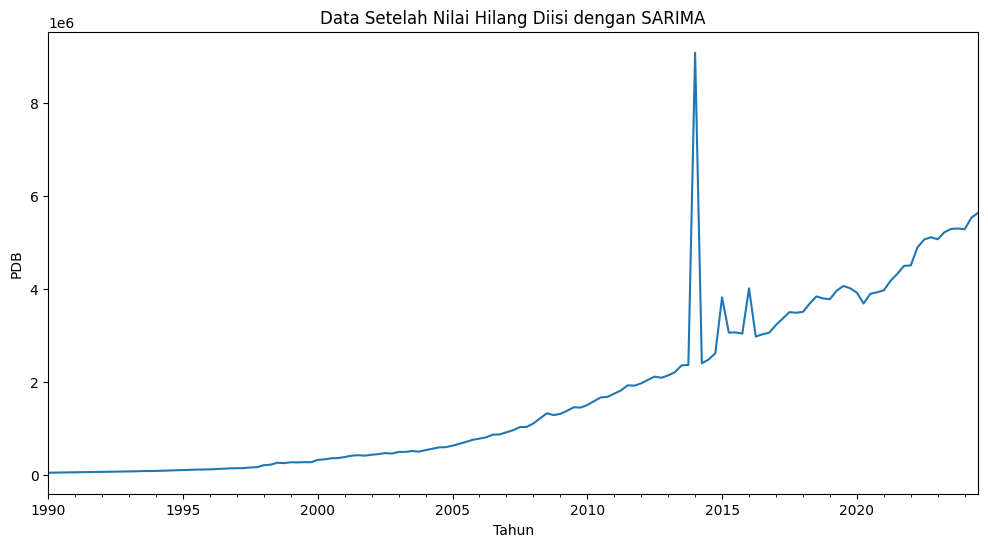

In [33]:
# Plot data setelah nilai hilang diisi dengan SARIMA
df_fixed['PDB'].plot(title="Data Setelah Nilai Hilang Diisi dengan SARIMA", figsize=(12, 6))
plt.xlabel("Tahun")
plt.ylabel("PDB")
plt.show()

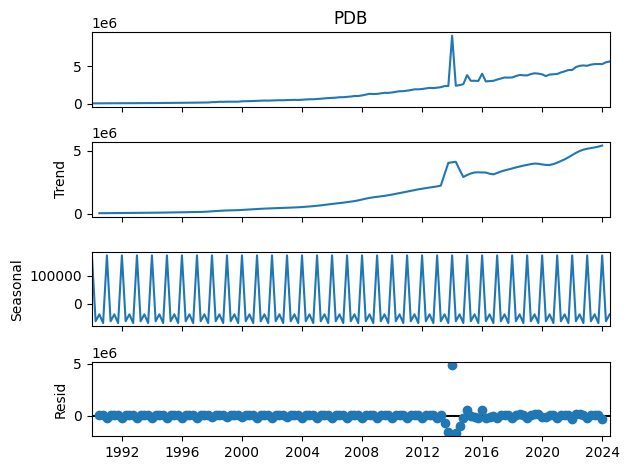

In [34]:
# Dekomposisi Time Series
decomposition = seasonal_decompose(df_fixed['PDB'], model='additive', period=4)
decomposition.plot()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34865D+01    |proj g|=  1.21221D-01

At iterate    5    f=  1.33650D+01    |proj g|=  2.55268D-02

At iterate   10    f=  1.33452D+01    |proj g|=  2.14431D-03

At iterate   15    f=  1.33450D+01    |proj g|=  1.80908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   1.809D-05   1.335D+01
  F =   13.345046135405006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


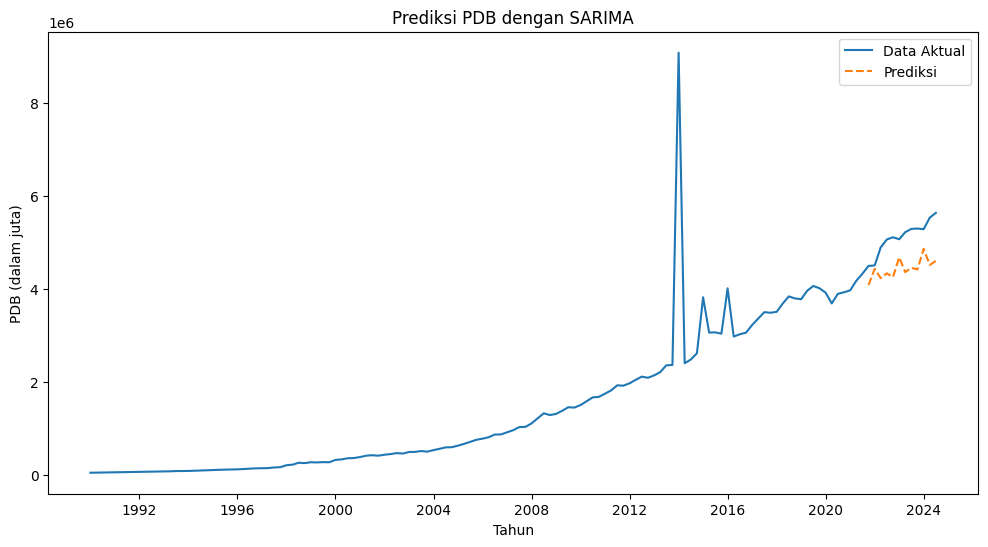

In [35]:
# Membagi data menjadi train dan test
train = df.iloc[:-12]  # Semua data kecuali 12 kuartal terakhir
test = df.iloc[-12:]  # 12 kuartal terakhir

# Membangun model SARIMA
model = SARIMAX(train['PDB'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarima_model = model.fit()

# Membuat prediksi
forecast = sarima_model.forecast(steps=12)

# Plot hasil prediksi vs data aktual
plt.figure(figsize=(12, 6))
plt.plot(df_fixed['PDB'], label="Data Aktual")
plt.plot(test.index, forecast, label="Prediksi", linestyle='--')
plt.title("Prediksi PDB dengan SARIMA")
plt.xlabel("Tahun")
plt.ylabel("PDB (dalam juta)")
plt.legend()
plt.show()


In [36]:
# Evaluasi performa model
mae = mean_absolute_error(test['PDB'], forecast)
mse = mean_squared_error(test['PDB'], forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['PDB'], forecast)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 680723.241694273
MSE: 543425644057.2534
RMSE: 737174.0934523224
MAPE: 0.13049849577712902
